In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [4]:
x,y = generateData()

In [5]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0]])

In [6]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

In [7]:
init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [8]:
W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [9]:
# Unstack columns
inputs_series = tf.split(batchX_placeholder, truncated_backprop_length, 1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [10]:
# Forward passes
cell = tf.contrib.rnn.core_rnn_cell.BasicRNNCell(state_size)

In [11]:
with tf.variable_scope('rnn'):
    states_series, current_state = tf.contrib.rnn.static_rnn(cell, inputs_series, init_state)

In [12]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, 
          labels in zip(logits_series, labels_series)]
total_loss = tf.reduce_mean(losses)

In [13]:
train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [14]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

New data, epoch 0
Step 0 Loss 0.682285
Step 100 Loss 0.0111657
Step 200 Loss 0.00375671
Step 300 Loss 0.00231522
Step 400 Loss 0.0015996
Step 500 Loss 0.00189425
Step 600 Loss 0.00123938
New data, epoch 1
Step 0 Loss 0.108997
Step 100 Loss 0.00144955
Step 200 Loss 0.00116397
Step 300 Loss 0.000781388
Step 400 Loss 0.000888675
Step 500 Loss 0.000786765
Step 600 Loss 0.000430139
New data, epoch 2
Step 0 Loss 0.216511
Step 100 Loss 0.000803392
Step 200 Loss 0.000611625
Step 300 Loss 0.00042807
Step 400 Loss 0.000453076
Step 500 Loss 0.000654293
Step 600 Loss 0.000294933
New data, epoch 3
Step 0 Loss 0.106962
Step 100 Loss 0.000366702
Step 200 Loss 0.000292233
Step 300 Loss 0.000332368
Step 400 Loss 0.000239803
Step 500 Loss 0.000227313
Step 600 Loss 0.000228524
New data, epoch 4
Step 0 Loss 0.191373
Step 100 Loss 0.000197043
Step 200 Loss 0.000167058
Step 300 Loss 0.000196624
Step 400 Loss 0.000245492
Step 500 Loss 0.000198924
Step 600 Loss 0.000202521
New data, epoch 5
Step 0 Loss 0.1521

Step 100 Loss 2.83931e-05
Step 200 Loss 2.20817e-05
Step 300 Loss 2.55447e-05
Step 400 Loss 2.78624e-05
Step 500 Loss 2.69626e-05
Step 600 Loss 2.60153e-05
New data, epoch 43
Step 0 Loss 0.166094
Step 100 Loss 2.50505e-05
Step 200 Loss 3.52016e-05
Step 300 Loss 2.51284e-05
Step 400 Loss 2.84803e-05
Step 500 Loss 2.57021e-05
Step 600 Loss 2.8749e-05
New data, epoch 44
Step 0 Loss 0.156957
Step 100 Loss 3.18607e-05
Step 200 Loss 2.57688e-05
Step 300 Loss 3.12014e-05
Step 400 Loss 2.87841e-05
Step 500 Loss 2.07705e-05
Step 600 Loss 2.69389e-05
New data, epoch 45
Step 0 Loss 0.198756
Step 100 Loss 2.74744e-05
Step 200 Loss 2.72868e-05
Step 300 Loss 2.55273e-05
Step 400 Loss 2.1171e-05
Step 500 Loss 2.7188e-05
Step 600 Loss 2.05114e-05
New data, epoch 46
Step 0 Loss 0.1903
Step 100 Loss 2.75681e-05
Step 200 Loss 2.81213e-05
Step 300 Loss 1.96675e-05
Step 400 Loss 2.15873e-05
Step 500 Loss 2.56293e-05
Step 600 Loss 1.8949e-05
New data, epoch 47
Step 0 Loss 0.223667
Step 100 Loss 4.56042e-05


Step 100 Loss 1.7202e-05
Step 200 Loss 2.18462e-05
Step 300 Loss 1.54843e-05
Step 400 Loss 1.89603e-05
Step 500 Loss 1.8617e-05
Step 600 Loss 1.93814e-05
New data, epoch 85
Step 0 Loss 0.152228
Step 100 Loss 1.26853e-05
Step 200 Loss 2.08818e-05
Step 300 Loss 1.54556e-05
Step 400 Loss 1.66906e-05
Step 500 Loss 1.3995e-05
Step 600 Loss 1.7223e-05
New data, epoch 86
Step 0 Loss 0.181808
Step 100 Loss 1.60056e-05
Step 200 Loss 1.57067e-05
Step 300 Loss 1.37708e-05
Step 400 Loss 1.41539e-05
Step 500 Loss 1.38312e-05
Step 600 Loss 1.61439e-05
New data, epoch 87
Step 0 Loss 0.142761
Step 100 Loss 1.78428e-05
Step 200 Loss 1.92542e-05
Step 300 Loss 1.32177e-05
Step 400 Loss 1.84262e-05
Step 500 Loss 1.60674e-05
Step 600 Loss 1.78047e-05
New data, epoch 88
Step 0 Loss 0.186872
Step 100 Loss 1.69878e-05
Step 200 Loss 1.71769e-05
Step 300 Loss 1.62646e-05
Step 400 Loss 1.26439e-05
Step 500 Loss 1.30668e-05
Step 600 Loss 1.70641e-05
New data, epoch 89
Step 0 Loss 0.115448
Step 100 Loss 1.46021e-0

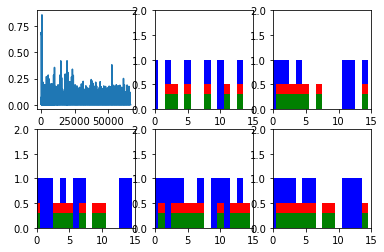

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

In [14]:
plt.ioff()
plt.show()